In [1]:
import sys
sys.path.insert(0, "C:\\code\\python_for_the_financial_economist")

"""
Magic commands
"""

%load_ext autoreload
%autoreload 2

"""
Load relevant packages
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import pandas_datareader as pdr

import datetime

"""
Load own functions/packages
"""


# set plotting style

from codelib.visualization.layout import DefaultStyle
DefaultStyle();

# Data Sources

This notebook showcases how to obtain the different data sources used in the course. We will either use different APIs provided by the Python community or load data directly from the `..\data` folder. 


# Quandl

[Quandl](https://www.quandl.com/) provides both free and premium (read "you need to pay") data sets. It is possible to access data sets using a Python API. The documentation can be found [here](https://docs.quandl.com/). Examples of data sets / data bases include

* [Federal Reserve Economic Data](https://www.quandl.com/data/FRED-Federal-Reserve-Economic-Data)
* [European Central Bank](https://www.quandl.com/data/ECB-European-Central-Bank)
* [Economist](https://www.quandl.com/data/ECONOMIST-The-Economist-Big-Mac-Index)

Check out [Quandl](https://www.quandl.com/) and see if you can find some interesting data sets to work with! 

To install and use Quandl, we can simple do 

```Python
pip install quandl
import quandl
```

The documentation states:

_"The Quandl Python module is free but you must have a Quandl API key in order to download data. To get your own API key, you will need to create a free Quandl account and set your API key._

_After importing the Quandl module, you can set your API key with the following command: quandl.ApiConfig.api_key = "YOURAPIKEY""_



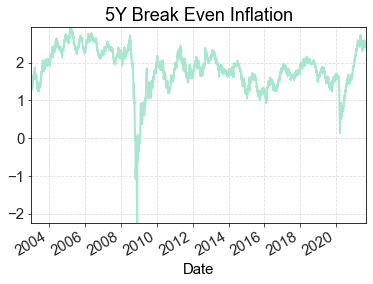

In [2]:
# import quandl package
import quandl

# get API Key saved as an environment variable
import os 
api_key = os.getenv('quandl_key')
quandl.ApiConfig.api_key = api_key


"""
Federal Reserve Economic Data
"""

beir_5y = quandl.get("FRED/T5YIE")
beir_5y.plot(title='5Y Break Even Inflation', legend=""); 

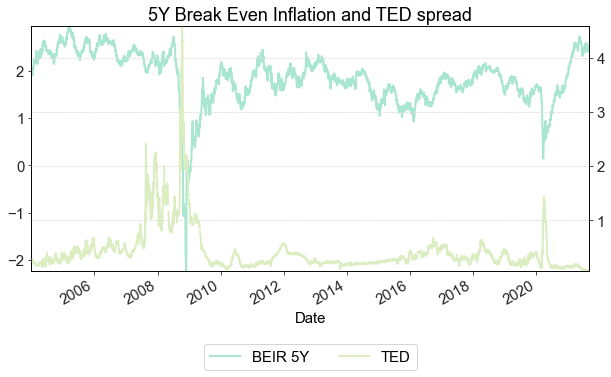

In [3]:
# get fred data
df_fred = quandl.get(["FRED/T5YIE", "FRED/TEDRATE"], start_date="2004-01-01")
# change column names
df_fred.columns = ["BEIR 5Y", "TED"]
ax = df_fred.plot(title='5Y Break Even Inflation and TED spread',
                  secondary_y="TED",
                  figsize=(10, 5));

# better looking legend
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='center', bbox_to_anchor=(0.5, -0.35), ncol=2); 

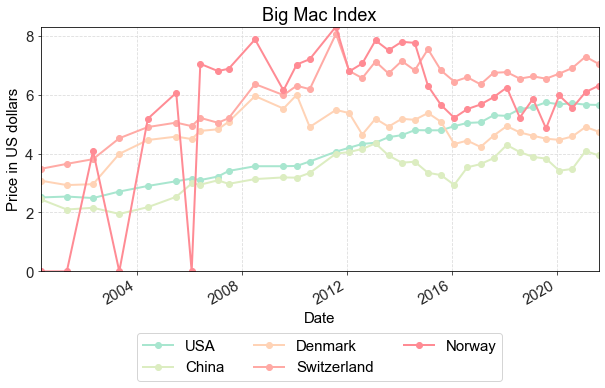

In [4]:
"""
Economist Data
"""

# get big mac data
country_codes = ['USA', 'CHL', 'DNK', 'CHE', 'NOR']
tickers = ["ECONOMIST/BIGMAC_" + c for c in country_codes]
variables_to_select = [t + ' - dollar_price' for t in tickers]

df_bigmac = quandl.get(tickers, start_date="2000-01-01")
df_bigmac = df_bigmac.loc[:, variables_to_select]
# change column names
df_bigmac.columns = ["USA", "China", 'Denmark', 'Switzerland', 'Norway']
ax = df_bigmac.plot(title='Big Mac Index', style="o-",
                  figsize=(10, 5));

ax.legend(loc='center', bbox_to_anchor=(0.5, -0.35), ncol=3); 
ax.set_ylabel('Price in US dollars');

# The pandas-datareader package

The [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/index.html) package contains a range of different "data readers" (see all [here](https://pandas-datareader.readthedocs.io/en/latest/readers/index.html)). 

To install `pandas-datareader`, we can simple do 

```Python
pip install pandas-datareader
```

We will mainly use the data readers for 

* FRED - Federal Reserve Economic Data
* Fama-French Data (Ken French’s Data Library)
* Yahoo Finance

We will look at how to use the data readers below. 

## FRED - Federal Reserve Economic Data

We have already seen that we can access FRED data using Quandl. Alternatively, we can use `pandas-datareader`. 

The easiest way to find a ticker is to visit the [FRED homepage](https://fred.stlouisfed.org/) and search for the relevant data series. If we search for e.g. _gold_ then one would be able to find [_Gold Fixing Price 10:30 A.M. (London time) in London Bullion Market, based in U.S. Dollars_](https://fred.stlouisfed.org/series/GOLDAMGBD228NLBM) (first hit in my search). When selecting this, we find the ticker in brackets after the name or at the end of the url https://fred.stlouisfed.org/series/GOLDAMGBD228NLBM. 


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13940 entries, 1968-04-01 to 2021-09-03
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GOLDAMGBD228NLBM  13508 non-null  float64
dtypes: float64(1)
memory usage: 217.8 KB


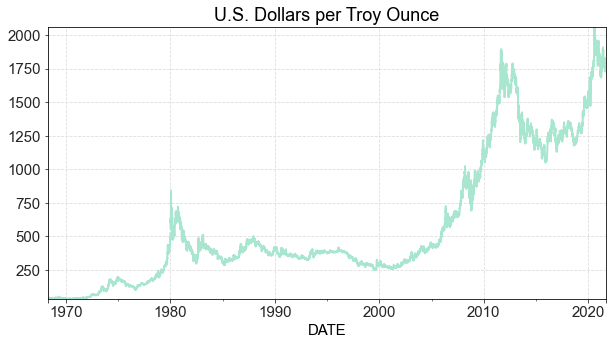

In [5]:
from pandas_datareader.data import DataReader
from pandas_datareader.fred import FredReader

start = datetime.date(1968, 1, 1)
# Set series code
series = 'GOLDAMGBD228NLBM'

# Import the data
gold_price = DataReader(series, 'fred', start=start)
# or FredReader(series, start=start).read()

# Inspect the price of gold
gold_price.info()

# Plot the price of gold
gold_price.plot(title="U.S. Dollars per Troy Ounce", figsize=(10, 5), legend=False); 


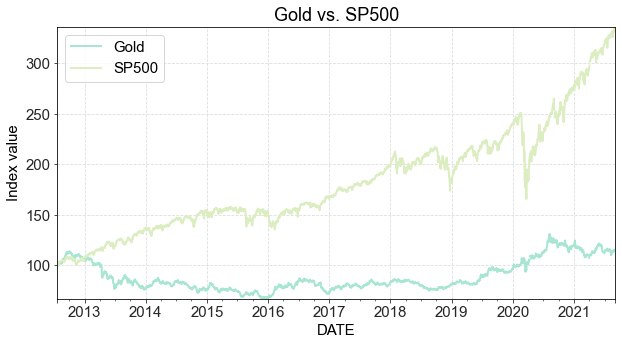

In [26]:
start = datetime.date(2012, 7, 22) # SP500 only available after this date

# Set series codes
series = ['GOLDAMGBD228NLBM', 'SP500']

# Import the data
prices = DataReader(series, 'fred', start=start)
prices.columns = ['Gold', 'SP500']
prices = prices / prices.iloc[0, :] * 100 # normalize base year

# Plot the price of gold
ax = prices.plot(title="Gold vs. SP500", figsize=(10, 5)); 
ax.set_ylabel('Index value'); 

## Yahoo Finance

`pandas-datareader` provides access to download data from [Yahoo Finance](https://finance.yahoo.com/) (the docoumentation van be found [here](https://pandas-datareader.readthedocs.io/en/latest/readers/yahoo.html)). We will mainly use Yahoo Finance for individual stock data. 

In [7]:
from pandas_datareader.yahoo.daily import YahooDailyReader
from pandas_datareader.yahoo.fx import YahooFXReader

"""
Get google stock price
"""

goog = YahooDailyReader('GOOG',start=datetime.date(2010, 1, 1)).read()
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,313.579620,310.954468,312.304413,312.204773,3927065.0,312.204773
2010-01-05,312.747742,309.609497,312.418976,310.829926,6031925.0,310.829926
2010-01-06,311.761444,302.047852,311.761444,302.994293,7987226.0,302.994293
2010-01-07,303.861053,295.218445,303.562164,295.940735,12876685.0,295.940735
2010-01-08,300.498657,293.455048,294.894653,299.885956,9484016.0,299.885956


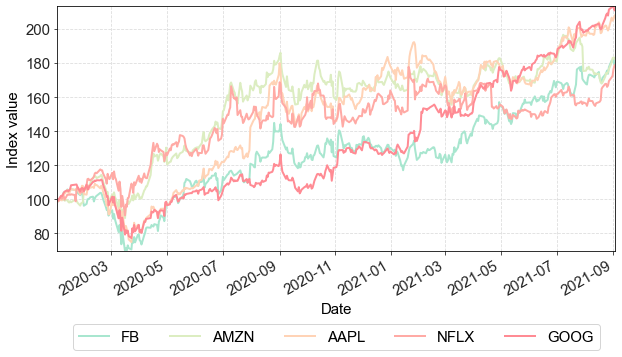

In [8]:
"""
Get adjusted stock prices for Facebook (FB), Amazon (AMZN), the company Apple (AAPL), 
Netflix (NFLX), and Alphabet (GOOG).
"""
tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
faang = YahooDailyReader(tickers, start=datetime.date(2020, 1, 1)).read()

"""
Get adjusted close
"""
faang_adj_close = faang['Adj Close']
faang_adj_close = faang_adj_close / faang_adj_close.iloc[0, :] * 100

"""
Plot stock prices
"""

ax = faang_adj_close.plot(figsize=(10, 5)); 
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.35), ncol=5); 
ax.set_ylabel('Index value');

In [9]:
"""
Get FX data 
"""

tickers = ['DKKUSD', 'EURUSD', 'NOKUSD', 'SEKUSD']
fx_data = YahooFXReader(tickers, start=datetime.date(2020, 1, 1)).read()

fx_data.head()

Low      Open      High     Close
PairCode Date                                              
DKKUSD   2019-12-31  0.149909  0.149930  0.150437  0.149934
         2020-01-01  0.150065  0.150087  0.150101  0.150089
         2020-01-02  0.149430  0.150177  0.150263  0.150177
         2020-01-03  0.148880  0.149499  0.149624  0.149495
         2020-01-06  0.149310  0.149369  0.149943  0.149359

In [10]:
"""
Unstack data
"""

fx_close = fx_data['Close'].unstack().T
fx_close.head()

PairCode,DKKUSD,EURUSD,NOKUSD,SEKUSD
Date,,,,
2019-12-31,0.149934,1.120230,0.113428,0.107013
2020-01-01,0.150089,1.122083,0.119659,0.109042
2020-01-02,0.150177,1.122083,0.114025,0.107073
2020-01-03,0.149495,1.117144,0.113754,0.106822
2020-01-06,0.149359,1.116196,0.113196,0.106274


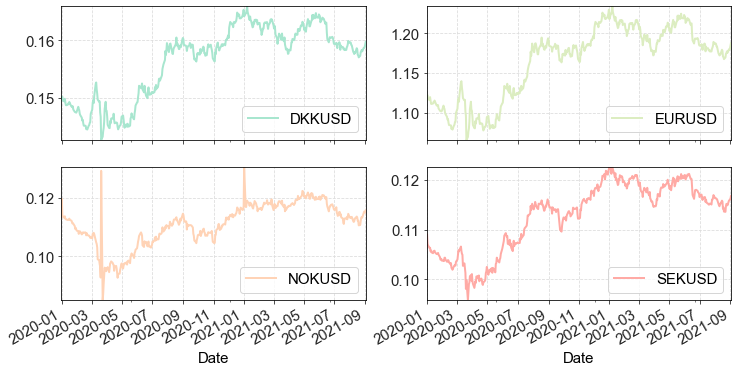

In [11]:
"""
Plot FX data
"""

fx_close.plot(figsize=(12, 6), subplots=True, layout=(2, 2)); 

## Kenneth R. French's data library

[Kenneth R. French provides a comprehensive data library](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) that is accessible using `pandas-datareader` (the documentation can be found [here](https://pandas-datareader.readthedocs.io/en/latest/readers/famafrench.html)). 

In [12]:
from pandas_datareader.famafrench import FamaFrenchReader, get_available_datasets

"""
Show available data sets
"""

get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [13]:
"""
Get the 49 industry portfolios
"""

reader = FamaFrenchReader("49_Industry_Portfolios_daily", start=datetime.datetime(1950, 1, 1))
industry_port_daily = reader.read()

# print description
industry_port_daily['DESCR']

'49 Industry Portfolios daily\n----------------------------\n\nThis file was created by CMPT_IND_RETS_DAILY using the 202106 CRSP database. It contains value- and equal-weighted returns for 49 industry portfolios. The portfolios are constructed at the end of June. Missing data are indicated by -99.99 or -999. Copyright 2021 Kenneth R. French\n\n  0 : Average Value Weighted Returns -- Daily (18077 rows x 49 cols)\n  1 : Average Equal Weighted Returns -- Daily (18077 rows x 49 cols)'

In [14]:
# get equally weighted
ind_eq_weighted = industry_port_daily[1]

# get market cap weighted 
ind_mc_weighted = industry_port_daily[0] 

# Remove whitespace form column names
ind_eq_weighted.columns = [_.strip() for _ in ind_eq_weighted.columns]
ind_mc_weighted.columns = [_.strip() for _ in ind_mc_weighted.columns]

In [15]:
ind_eq_weighted.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1950-01-03,1.47,-0.10,-99.99,-0.92,0.25,-1.30,-0.79,1.68,0.54,-0.10,...,0.22,0.30,-1.53,-0.03,0.26,-0.41,-0.53,0.32,-0.21,-0.32
1950-01-04,1.97,0.93,-99.99,2.05,0.70,2.40,1.36,1.82,1.10,0.33,...,0.83,3.34,0.90,1.01,-0.42,0.50,-0.21,1.28,0.78,0.07
1950-01-05,3.91,1.26,-99.99,0.13,1.15,0.78,0.83,0.65,1.23,1.42,...,0.58,0.31,0.93,0.93,0.04,0.65,0.36,0.49,1.31,0.59
1950-01-06,-0.79,1.34,-99.99,0.92,0.05,1.64,-0.09,0.70,0.20,0.27,...,0.11,1.06,0.39,0.64,0.84,-0.14,0.04,0.08,-0.62,0.08
1950-01-07,-3.11,1.20,-99.99,0.87,0.56,0.08,0.65,0.17,0.70,0.97,...,1.13,0.65,2.13,1.03,1.82,0.23,0.18,0.40,1.22,0.30


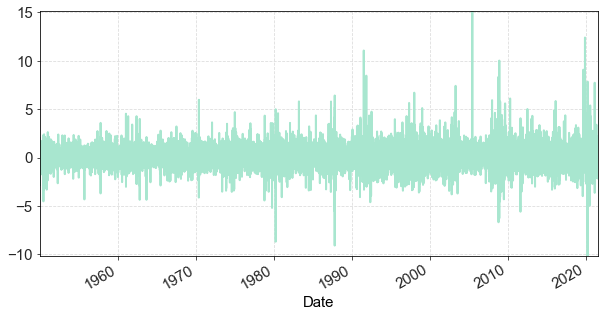

In [16]:
ind_eq_weighted['Beer'].plot(figsize=(10, 5)); 

# Yield curve data, the term structure of interest rates 

[Federal reserve](https://www.federalreserve.gov/data/yield-curve-models.htm) provides yield curve data for the nominal U.S. yield curve and the TIPS yield curve. These data sets have been used extensively in empirical research. 


### Nominal U.S. yield curve

In the paper [The U.S. Treasury yield curve: 1961 to the present](https://www.sciencedirect.com/science/article/pii/S0304393207000840) Gürkaynaka, Sack and Wright provides daily yield curve estimates that are updated regularly. 

They apply the [Svensson (1994)](https://www.nber.org/papers/w4871) methodology (an extension of [Nelson and Siegel (1987)](https://www.jstor.org/stable/2352957?seq=1&cid=pdf-reference)) to interpolate the yield curve. Basically, the model specify the instantaneous forward rate as 

$$
f_t = \beta_0 + \beta_1 \exp (-t/{\tau_1}) + \beta_2 (-t/{\tau_1}) \exp (-t/{\tau_1}) + \beta_3 (-t/{\tau_2}) \exp (-t/{\tau_2})
$$

and thereby also the zero-coupon yield curve. We will discuss this in more detail later in the course. 

The data set is located in `..\..\data\feds200628.csv` 



In [17]:
"""
We need to import the following packages (I have already done so in the top of this notebook): 

import pandas as pd 

for additional information one can use e.g. 

?pd.read_csv or shift + tab
"""

yield_data = pd.read_csv("../../data/feds200628.csv", skiprows=9, index_col=0, parse_dates=True)
yield_data.head()

,BETA0,BETA1,BETA2,BETA3,SVEN1F01,SVEN1F04,SVEN1F09,SVENF01,SVENF02,SVENF03,...,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30,TAU1,TAU2
Date,,,,,,,,,,,,,,,,,,,,,
1961-06-14,3.917606,-1.277955,-1.949397,0.0,3.8067,3.9562,NaN,3.5492,3.8825,3.9149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339218,-999.99
1961-06-15,3.978498,-1.257404,-2.247617,0.0,3.8694,4.0183,NaN,3.5997,3.9460,3.9763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.325775,-999.99
1961-06-16,3.984350,-1.429538,-1.885024,0.0,3.8634,4.0242,NaN,3.5957,3.9448,3.9811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.348817,-999.99
1961-06-19,4.004379,-0.723311,-3.310743,0.0,3.9196,4.0447,NaN,3.6447,3.9842,4.0035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282087,-999.99
1961-06-20,3.985789,-0.900432,-2.844809,0.0,3.8732,4.0257,NaN,3.5845,3.9552,3.9840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310316,-999.99


In [18]:
parameters = yield_data[['BETA0', 'BETA1', 'BETA2', 'BETA3', 'TAU1', 'TAU2']]

not_zero_yield_cols = [c for c in yield_data.columns if c.lower()[:5] != 'sveny']
zero_yields = yield_data.drop(not_zero_yield_cols, axis=1)

not_par_yield_cols = [c for c in yield_data.columns if c.lower()[:6] != 'svenpy']
par_yields = yield_data.drop(not_par_yield_cols, axis=1)

not_inst_forward_cols = [c for c in yield_data.columns if c.lower()[:5] != 'svenf']
instaneous_forward_rate = yield_data.drop(not_inst_forward_cols, axis=1)

not_one_year_forward_cols = [c for c in yield_data.columns if c.lower()[:6] != 'sven1f']
one_year_forward_rate = yield_data.drop(not_one_year_forward_cols, axis=1)

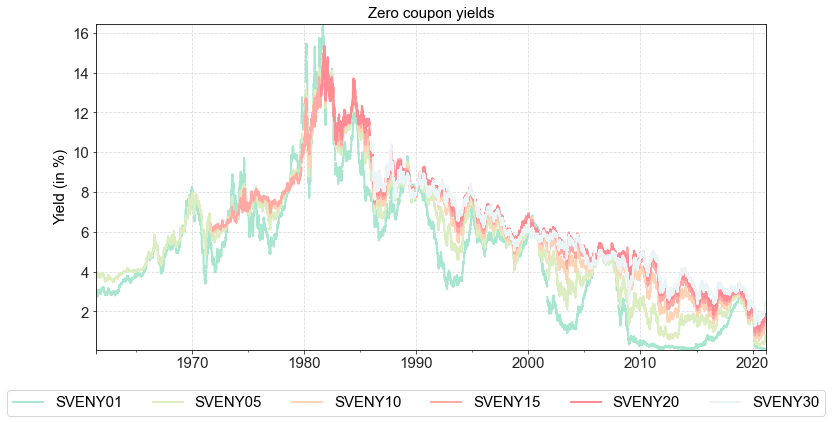

In [19]:
zero_yields[['SVENY01', 'SVENY05', 'SVENY10', 'SVENY15', 'SVENY20', 'SVENY30']].plot(figsize=(12, 6));
plt.ylabel('Yield (in %)', size='15')
plt.xlabel('')
plt.title("Zero coupon yields", size=15);
plt.legend(bbox_to_anchor=(1.1, -0.1), ncol= 6);

### Ti

In the paper [The TIPS Yield Curve and Inflation Compensation](https://www.jstor.org/stable/25760285) (see also this [version](https://www.federalreserve.gov/pubs/feds/2008/200805/200805pap.pdf)) Gürkaynaka, Sack and Wright provides TIPS (Treasury Inflation-Protected Securities) yield curves estimates that are updated regularly. 

The same methodology as for the nominal yield curve is applied.  

The data set is located in `..\..\data\feds200805.csv` 


In [20]:
real_yield_data = pd.read_csv("../../data/feds200805.csv", skiprows=18, index_col=0, parse_dates=True)
real_yield_data.head()

,BETA0,BETA1,BETA2,BETA3,BKEVEN02,BKEVEN03,BKEVEN04,BKEVEN05,BKEVEN06,BKEVEN07,...,TIPSY11,TIPSY12,TIPSY13,TIPSY14,TIPSY15,TIPSY16,TIPSY17,TIPSY18,TIPSY19,TIPSY20
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-04,3.069626,0.579520,1.846801,NaN,0.8639,0.8034,0.7736,0.7784,0.8133,0.8708,...,3.9257,3.9223,3.9166,3.9090,3.9000,3.8896,3.8783,3.8661,3.8532,3.8399
1999-01-05,3.556965,-0.075437,1.358912,NaN,0.9296,0.8411,0.7965,0.7966,0.8337,0.8979,...,3.9037,3.8920,3.8795,3.8668,3.8542,3.8419,3.8299,3.8185,3.8077,3.7974
1999-01-06,3.672446,-23.672446,25.712731,NaN,2.0491,0.9450,0.7243,0.7335,0.8066,0.8998,...,3.8107,3.7992,3.7895,3.7811,3.7739,3.7675,3.7619,3.7570,3.7525,3.7485
1999-01-07,3.633148,-23.633148,25.997827,NaN,2.1274,0.9656,0.7354,0.7552,0.8440,0.9527,...,3.7985,3.7847,3.7731,3.7631,3.7544,3.7468,3.7401,3.7342,3.7289,3.7241
1999-01-08,3.578644,-0.477175,1.669680,NaN,1.0941,0.9768,0.9268,0.9335,0.9823,1.0591,...,3.8262,3.8116,3.7978,3.7850,3.7731,3.7622,3.7523,3.7432,3.7349,3.7274


In [21]:
parameters = real_yield_data[['BETA0', 'BETA1', 'BETA2', 'BETA3', 'TAU1', 'TAU2']]

"""
Yields
"""

not_zero_yield_cols = [c for c in real_yield_data.columns if c.lower()[:5] != 'tipsy']
zero_yields = real_yield_data.drop(not_zero_yield_cols, axis=1)

not_par_yield_cols = [c for c in real_yield_data.columns if c.lower()[:6] != 'tipspy']
par_yields = real_yield_data.drop(not_par_yield_cols, axis=1)

not_inst_forward_cols = [c for c in real_yield_data.columns if c.lower()[:5] != 'tipsf']
instaneous_forward_rate = real_yield_data.drop(not_inst_forward_cols, axis=1)

not_one_year_forward_cols = [c for c in real_yield_data.columns if c.lower()[:6] != 'tips1f']
one_year_forward_rate = real_yield_data.drop(not_one_year_forward_cols, axis=1)

not_five_year_forward_cols = [c for c in real_yield_data.columns if c.lower()[:7] != 'tips5f5']
five_year_forward_rate = real_yield_data.drop(not_five_year_forward_cols, axis=1)

"""
Inflation compensation 
"""

not_beir_cols = [c for c in real_yield_data.columns if c.lower()[:6] != 'bkeven']
beir = real_yield_data.drop(not_beir_cols, axis=1)

not_par_beir_cols = [c for c in real_yield_data.columns if c.lower()[:8] != 'bkevenpy']
par_beir = real_yield_data.drop(not_par_beir_cols, axis=1)

not_inst_forward_beir_cols = [c for c in real_yield_data.columns if c.lower()[:7] != 'bkevenf']
instaneous_forward_beir_rate = real_yield_data.drop(not_inst_forward_beir_cols, axis=1)

not_one_year_forward_beir_cols = [c for c in real_yield_data.columns if c.lower()[:8] != 'bkeven1f']
one_year_forward_beir_rate = real_yield_data.drop(not_one_year_forward_beir_cols, axis=1)

not_five_year_forward_beir_cols = [c for c in real_yield_data.columns if c.lower()[:9] != 'bkeven5f5']
five_year_forward_beir_rate = real_yield_data.drop(not_five_year_forward_beir_cols, axis=1)

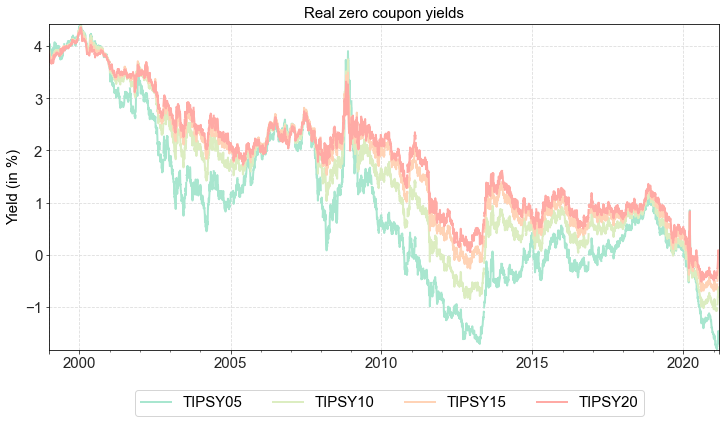

In [22]:
zero_yields[['TIPSY05', 'TIPSY10', 'TIPSY15', 'TIPSY20']].plot(figsize=(12, 6));
plt.ylabel('Yield (in %)', size='15')
plt.xlabel('')
plt.title("Real zero coupon yields", size=15);
plt.legend(bbox_to_anchor=(0.9, -0.1), ncol= 4);

# Measures of realized variance

[Oxford-Man Institute's "realised library"](https://realized.oxford-man.ox.ac.uk/) contains daily non-parametric measures of financial market volatility. 

The different estimators of the realized variance is given below

 <section id="content" class="body">
        <table cellpadding="0" cellspacing="0" border="0" class="table table-responsive table-striped table-hover table-sm" id="list-of-estimators">
            <colgroup>
                <col class="latest-values-column">
                <col class="latest-values-column-wide">
            </colgroup>
            <thead>
            <tr>
                <th rowspan="1" colspan="1">Code
                </th>
                <th rowspan="1" colspan="1">Description
                </th>
            </tr>
            </thead>
            <tbody>
                    <tr class="odd">
                        <td>bv</td>
                        <td>Bipower Variation (5-min)</td>
                    </tr>
                    <tr class="even">
                        <td>bv_ss</td>
                        <td>Bipower Variation (5-min Sub-sampled)</td>
                    </tr>
                    <tr class="odd">
                        <td>close_price</td>
                        <td>Closing (Last) Price</td>
                    </tr>
                    <tr class="even">
                        <td>close_time</td>
                        <td>Closing Time</td>
                    </tr>
                    <tr class="odd">
                        <td>medrv</td>
                        <td>Median Realized Variance (5-min)</td>
                    </tr>
                    <tr class="even">
                        <td>nobs</td>
                        <td>Number of Observations</td>
                    </tr>
                    <tr class="odd">
                        <td>open_price</td>
                        <td>Opening (First) Price</td>
                    </tr>
                    <tr class="even">
                        <td>open_time</td>
                        <td>Opening Time</td>
                    </tr>
                    <tr class="odd">
                        <td>open_to_close</td>
                        <td>Open to Close Return</td>
                    </tr>
                    <tr class="even">
                        <td>rk_parzen</td>
                        <td>Realized Kernel Variance (Non-Flat Parzen)</td>
                    </tr>
                    <tr class="odd">
                        <td>rk_th2</td>
                        <td>Realized Kernel Variance (Tukey-Hanning(2))</td>
                    </tr>
                    <tr class="even">
                        <td>rk_twoscale</td>
                        <td>Realized Kernel Variance (Two-Scale/Bartlett)</td>
                    </tr>
                    <tr class="odd">
                        <td>rsv</td>
                        <td>Realized Semi-variance (5-min)</td>
                    </tr>
                    <tr class="even">
                        <td>rsv_ss</td>
                        <td>Realized Semi-variance (5-min Sub-sampled)</td>
                    </tr>
                    <tr class="odd">
                        <td>rv10</td>
                        <td>Realized Variance (10-min)</td>
                    </tr>
                    <tr class="even">
                        <td>rv10_ss</td>
                        <td>Realized Variance (10-min Sub-sampled)</td>
                    </tr>
                    <tr class="odd">
                        <td>rv5</td>
                        <td>Realized Variance (5-min)</td>
                    </tr>
                    <tr class="even">
                        <td>rv5_ss</td>
                        <td>Realized Variance (5-min Sub-sampled)</td>
                    </tr>
            </tbody>
        </table>
    </section>

The data set is located in `..\..\data\oxfordmanrealizedvolatilityindices.csv` (updated 2021-07-23). 

In [23]:
realized_volatility = pd.read_csv("../../data/oxfordmanrealizedvolatilityindices.csv", skiprows=0, index_col=0, parse_dates=True)
realized_volatility.head()

,Symbol,open_to_close,open_time,medrv,rk_twoscale,rv5_ss,bv,rsv,rv5,rv10_ss,open_price,rk_th2,rv10,rsv_ss,close_price,nobs,rk_parzen,close_time,bv_ss
2000-01-03 00:00:00+00:00,.AEX,-0.000340,90101.0,0.000050,0.000103,0.000130,0.000100,0.000046,0.000130,0.000178,675.67,0.000102,0.000178,0.000046,675.44,1795.0,0.000179,163015.0,0.000100
2000-01-04 00:00:00+00:00,.AEX,-0.033606,90416.0,0.000075,0.000199,0.000201,0.000207,0.000147,0.000201,0.000261,664.20,0.000201,0.000261,0.000147,642.25,1785.0,0.000423,163016.0,0.000207
2000-01-05 00:00:00+00:00,.AEX,-0.001675,90016.0,0.000166,0.000325,0.000491,0.000361,0.000328,0.000491,0.000714,633.37,0.000345,0.000714,0.000328,632.31,1801.0,0.000324,163016.0,0.000361
2000-01-06 00:00:00+00:00,.AEX,-0.013130,90016.0,0.000152,0.000218,0.000225,0.000258,0.000116,0.000225,0.000182,632.46,0.000221,0.000182,0.000116,624.21,1799.0,0.000219,163002.0,0.000258
2000-01-07 00:00:00+00:00,.AEX,0.025013,90046.0,0.000039,0.000126,0.000138,0.000130,0.000048,0.000138,0.000157,628.93,0.000123,0.000157,0.000048,644.86,1798.0,0.000155,163016.0,0.000130


In [24]:
"""
Available tickers
"""

realized_volatility['Symbol'].unique()

array(['.AEX', '.AORD', '.BFX', '.BSESN', '.BVLG', '.BVSP', '.DJI',
       '.FCHI', '.FTMIB', '.FTSE', '.GDAXI', '.GSPTSE', '.HSI', '.IBEX',
       '.IXIC', '.KS11', '.KSE', '.MXX', '.N225', '.NSEI', '.OMXC20',
       '.OMXHPI', '.OMXSPI', '.OSEAX', '.RUT', '.SMSI', '.SPX', '.SSEC',
       '.SSMI', '.STI', '.STOXX50E'], dtype=object)

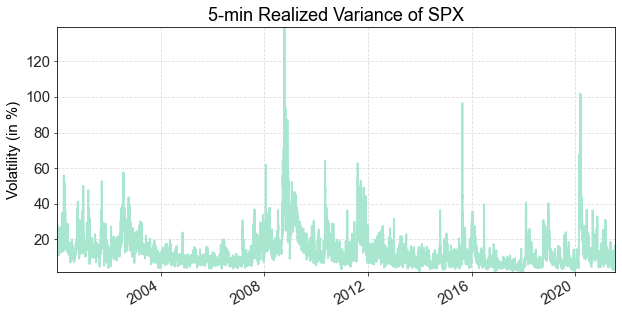

In [25]:
"""
Plot 5-min Realized Variance for SPX
"""

spx_rv5 = realized_volatility[realized_volatility['Symbol'] =='.SPX']['rv5']

# annualize, turn in pct, standard deviation
spx_rv5 = np.sqrt(spx_rv5 * 100 * 100) * np.sqrt(250)

ax = spx_rv5.plot(figsize=(10, 5), title="5-min Realized Variance of SPX")
ax.set_ylabel('Volatility (in %)'); 